In [1]:
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AliHaider20/AIM-5001/main/Feature%20engineering/M10_Data.csv", header=None)
df.columns= ["Symboling", "Normalized_losses", "Make", "Fuel_type", "Aspiration", "Ndoors", "Body_style",
             "Drive_wheels", "Engine_Location", "Wheel_base", "Length", "Width", "Height", "Curb_weight",
             "Engine_type", "NCylinders", "Engine_size", "Fuel_system", "Bore","Stroke","Compression_ratio",
             "Horsepower", "Peak_rpm", "City_mpg", "Highway_mpg", "Price"]
df.head()

,Symboling,Normalized_losses,Make,Fuel_type,Aspiration,Ndoors,Body_style,Drive_wheels,Engine_Location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.replace("?", np.NaN, inplace=True)
df.isna().sum()

Symboling             0
Normalized_losses    41
Make                  0
Fuel_type             0
Aspiration            0
Ndoors                2
Body_style            0
Drive_wheels          0
Engine_Location       0
Wheel_base            0
Length                0
Width                 0
Height                0
Curb_weight           0
Engine_type           0
NCylinders            0
Engine_size           0
Fuel_system           0
Bore                  4
Stroke                4
Compression_ratio     0
Horsepower            2
Peak_rpm              2
City_mpg              0
Highway_mpg           0
Price                 4
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          205 non-null    int64  
 1   Normalized_losses  164 non-null    object 
 2   Make               205 non-null    object 
 3   Fuel_type          205 non-null    object 
 4   Aspiration         205 non-null    object 
 5   Ndoors             203 non-null    object 
 6   Body_style         205 non-null    object 
 7   Drive_wheels       205 non-null    object 
 8   Engine_Location    205 non-null    object 
 9   Wheel_base         205 non-null    float64
 10  Length             205 non-null    float64
 11  Width              205 non-null    float64
 12  Height             205 non-null    float64
 13  Curb_weight        205 non-null    int64  
 14  Engine_type        205 non-null    object 
 15  NCylinders         205 non-null    object 
 16  Engine_size        205 non

In [5]:
df.describe()

,Symboling,Wheel_base,Length,Width,Height,Curb_weight,Engine_size,Compression_ratio,City_mpg,Highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# EDA

<AxesSubplot:ylabel='Frequency'>

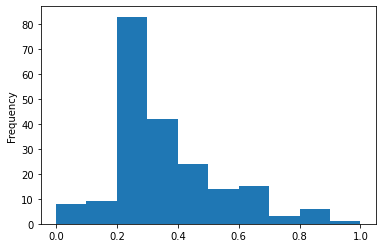

In [6]:
df.Wheel_base = (df.Wheel_base-df.Wheel_base.min())/(df.Wheel_base.max()-df.Wheel_base.min())
df.Wheel_base.plot(kind='hist')

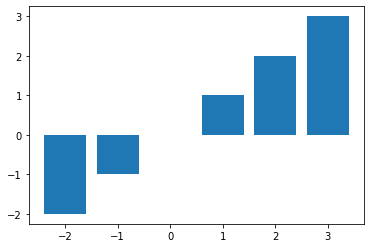

In [7]:
plt.bar(df.Symboling, df.Symboling.values);

# 2: Apply Data Engineering on Number of Doors and Price features.

### N Doors

In [8]:
df[df.Ndoors.isna()].Price

27     8558
63    10795
Name: Price, dtype: object

In [9]:
for i in range(8300, 8590):
    x = df[df.Price == str(i)].Ndoors.values
    if len(x) > 0:
        print(x)
        print(i)
        break

['four']
8358


In [10]:
df.iloc[81].Price

'8499'

In [11]:
df.loc[27, "Ndoors"] = df.iloc[81].Ndoors

In [12]:
for i in range(10975, 11200):
    x = df[df.Price == str(i)].Ndoors.values
    if len(x) > 0:
        print(x)
        print(i)
        break
i-10975

['two']
11048


73

In [13]:
for i in range(10975-73, 10975):
    x = df[df.Price == str(i)].Ndoors.values
    if len(x) > 0:
        print(x)
        print(i)
        break
10975-i

['two']
10945


30

In [14]:
df.loc[63, "Ndoors"] = df[df.Price=="10945"].Ndoors.values

In [15]:
df.Ndoors.isna().sum()

0

# 3. Apply Data Engineering on Engine Size and Stroke features.

## Engine Size

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


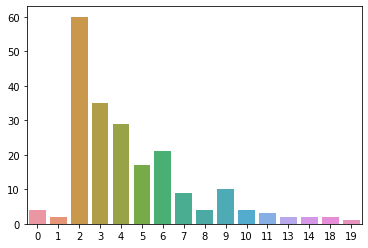

In [16]:
cats = pd.cut(df.Engine_size.tolist(), 20)
un = np.unique(cats.codes, return_counts=True)
sns.barplot(un[0], un[1]);

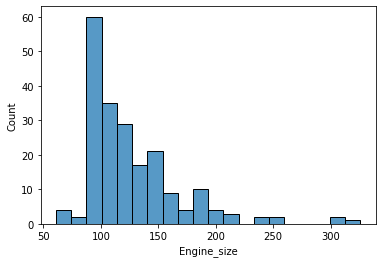

In [17]:
sns.histplot(df.Engine_size, bins=20);

## Stroke

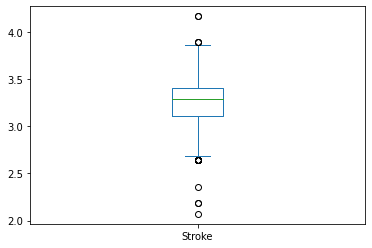

In [18]:
pd.to_numeric(df.Stroke[df.Stroke.notnull()]).plot(kind='box');

In [19]:
df[df.Stroke.isna()].Engine_size

55    70
56    70
57    70
58    80
Name: Engine_size, dtype: int64

In [20]:
for i in range(60, 80):
    x = df[df.Engine_size == i].Stroke.values
    if len(x) > 0:
        print(x)
        print(i)

['3.03']
61
[nan nan nan]
70
['3.07']
79


Since two values of the Stroke of Engine Size values are equidistant we'll take the round of the average Stroke values.

In [21]:
df.loc[55:58, "Stroke"] = round(3.03/3.07)

In [22]:
for i in range(70, 90):
    x = df[df.Engine_size == i].Stroke.values
    if len(x) > 0:
        print(x)
        print(i)

[1 1 1]
70
['3.07']
79
[1]
80


As there is only one value close to the missing point we replace it with that.

In [23]:
df.loc[58, "Stroke"] = 3.07

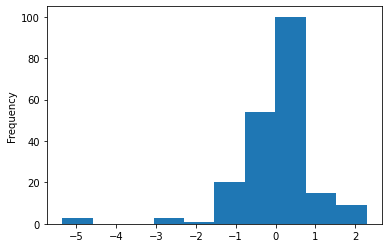

In [24]:
df.Stroke = pd.to_numeric(df.Stroke)
df.Stroke = (df.Stroke - df.Stroke.mean())/df.Stroke.std()
df.Stroke.plot(kind='hist');

As we apply Standardization on the Stroke feature it doesn't change it's structure as there are many extreme values which can be called as potential outliers as they are 2 standard deviation away from the mean.

# 5: Dimensionality Reduction Analysis.

Before applying PCA we need to remove the Null values as PCA doesn't work on Null values.

In [25]:
from sklearn.decomposition import PCA
new_df = df[['Wheel_base', 'Length', 'Width','Height','Curb_weight','Engine_size',
      'Compression_ratio',"Horsepower", 'Peak_rpm','City_mpg']]
new_df.isna().sum()

Wheel_base           0
Length               0
Width                0
Height               0
Curb_weight          0
Engine_size          0
Compression_ratio    0
Horsepower           2
Peak_rpm             2
City_mpg             0
dtype: int64

In [26]:
new_df[new_df.Horsepower.isna()].index
new_df[new_df.Peak_rpm.isna()].index

Int64Index([130, 131], dtype='int64')

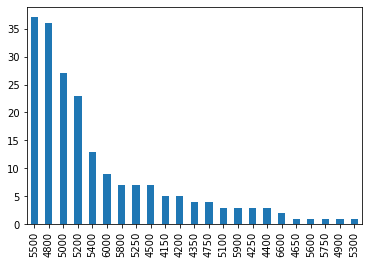

In [27]:
new_df.Peak_rpm.value_counts().plot(kind='bar');

<AxesSubplot:>

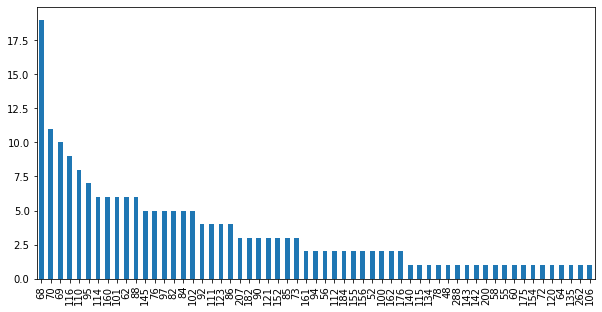

In [28]:
plt.figure(figsize=(10,5))
new_df.Horsepower.value_counts().plot(kind='bar')

In [30]:
new_df.loc[130:132, "Horsepower"] = 68 
new_df.loc[130:132, "Peak_rpm"] = 5500
new_df.loc[:, "Horsepower"] = new_df["Horsepower"].apply(pd.to_numeric)
new_df.loc[:, "Peak_rpm"] = new_df["Peak_rpm"].apply(pd.to_numeric)
new_df.isna().sum()

/tmp/ipykernel_46655/2637612056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:, "Horsepower"] = new_df["Horsepower"].apply(pd.to_numeric)
/tmp/ipykernel_46655/2637612056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:, "Peak_rpm"] = new_df["Peak_rpm"].apply(pd.to_numeric)


Wheel_base           0
Length               0
Width                0
Height               0
Curb_weight          0
Engine_size          0
Compression_ratio    0
Horsepower           0
Peak_rpm             0
City_mpg             0
dtype: int64

# Using PCA to reduce the dimension and get 95% information from the dataset.

In [32]:
pca = PCA(5)
principalComponents = pca.fit_transform(new_df)
print(principalComponents[0])

[  70.47865451 -109.38196353   11.51191339    5.86941303    3.53808605]
